In [1]:
# imports 
import os
import pandas as pd
import numpy as np

# load data
train = pd.read_csv('../data/processed/train_data_processed.csv')
test = pd.read_csv('../data/processed/test_data_processed.csv')
val = pd.read_csv('../data/processed/val_data_processed.csv')

In [2]:
# more feature engineering
# use encoder to encode OCCURRED_ON_DATE column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['OCCURRED_ON_DATE'] = le.fit_transform(train['OCCURRED_ON_DATE'])
test['OCCURRED_ON_DATE'] = le.transform(test['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] = le.transform(val['OCCURRED_ON_DATE'])

In [3]:
# save le 
import joblib
joblib.dump(le, '../models/datetime_encoder.pkl')

['../models/datetime_encoder.pkl']

In [4]:
#drop _id column

test = test.drop('_id', axis=1)
val = val.drop('_id', axis=1)

In [5]:
# define the target variable
y_train = train['Severe_crimes']
y_test = test['Severe_crimes']
y_val = val['Severe_crimes']

# define the features
X_train = train.drop(['Severe_crimes'], axis=1)
X_test = test.drop(['Severe_crimes'], axis=1)
X_val = val.drop(['Severe_crimes'], axis=1)

In [6]:
# build a CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))





Epoch 1/50


964/964 [==============================] - 3s 2ms/step - loss: 7.3420 - accuracy: 0.8907 - val_loss: 0.1911 - val_accuracy: 0.9365
Epoch 2/50
964/964 [==============================] - 2s 2ms/step - loss: 0.4153 - accuracy: 0.9285 - val_loss: 0.2043 - val_accuracy: 0.9365
Epoch 3/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9308 - val_loss: 0.1859 - val_accuracy: 0.9365
Epoch 4/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2309 - accuracy: 0.9316 - val_loss: 0.1817 - val_accuracy: 0.9365
Epoch 5/50
964/964 [==============================] - 2s 2ms/step - loss: 0.2206 - accuracy: 0.9319 - val_loss: 0.1768 - val_accuracy: 0.9365
Epoch 6/50
964/964 [==============================] - 1s 1ms/step - loss: 0.2080 - accuracy: 0.9336 - val_loss: 0.1753 - val_accuracy: 0.9365
Epoch 7/50
964/964 [==============================] - 1s 1ms/step - loss: 0.1961 - accuracy: 0.9357 - val_loss: 0.1480 - val_accuracy: 0.9365
E

In [7]:
# use the model on validation data and evaluate
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)




484/484 [==============================] - 0s 768us/step
Accuracy: 0.9804137039431157
Confusion Matrix: [[14297   190]
 [  113   870]]
F1 Score: 0.8516886930983847


In [8]:
# build a deeper CNN model
model_deeper = Sequential()
model_deeper.add(Dense(512, input_dim=7, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(256, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(128, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(64, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(32, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(1, activation='sigmoid'))




# compile the model
model_deeper.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_deeper.summary()

# fit the model
history_deeper = model_deeper.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               4096      
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [9]:
# use the model on validation data and evaluate
y_pred = model_deeper.predict(X_val)
y_pred = (y_pred > 0.5)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)

484/484 [==============================] - 1s 1ms/step
Accuracy: 0.9654169360051713
Confusion Matrix: [[14023   464]
 [   71   912]]
F1 Score: 0.7732089868588384


In [10]:

# test different dropout rates
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
f1_scores = []

for rate in dropout_rates:
    model = Sequential()
    model.add(Dense(64, input_dim=7, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

    # use the model on validation data and evaluate
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)

    # f1 score
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

print(f1_scores)







Epoch 1/50
964/964 [==============================] - 2s 2ms/step - loss: 4.6706 - accuracy: 0.9069 - val_loss: 0.1600 - val_accuracy: 0.9491
Epoch 2/50
964/964 [==============================] - 2s 2ms/step - loss: 0.2398 - accuracy: 0.9280 - val_loss: 0.1171 - val_accuracy: 0.9456
Epoch 3/50
964/964 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9376 - val_loss: 0.1064 - val_accuracy: 0.9540
Epoch 4/50
964/964 [==============================] - 2s 2ms/step - loss: 0.1337 - accuracy: 0.9473 - val_loss: 0.0994 - val_accuracy: 0.9613
Epoch 5/50
964/964 [==============================] - 2s 2ms/step - loss: 0.1193 - accuracy: 0.9551 - val_loss: 0.0991 - val_accuracy: 0.9729
Epoch 6/50
964/964 [==============================] - 2s 2ms/step - loss: 0.1115 - accuracy: 0.9629 - val_loss: 0.1022 - val_accuracy: 0.9739
Epoch 7/50
964/964 [==============================] - 2s 2ms/step - loss: 0.1092 - accuracy: 0.9660 - val_loss: 0.0886 - val_accuracy: 0.9750
Epoch 

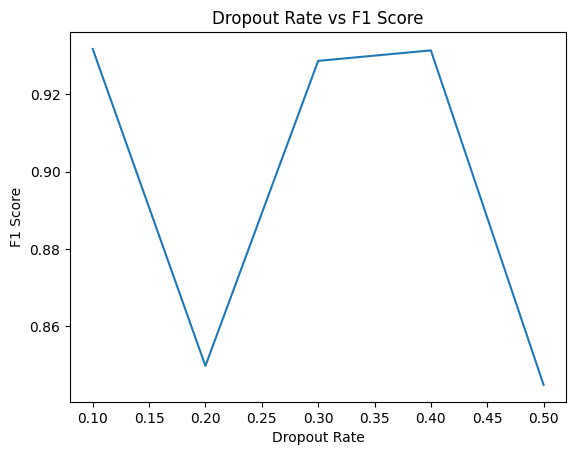

In [11]:
# draw the dropout rates vs f1 scores
import matplotlib.pyplot as plt
plt.plot(dropout_rates, f1_scores)
plt.xlabel('Dropout Rate')
plt.ylabel('F1 Score')
plt.title('Dropout Rate vs F1 Score')
plt.show()



In [12]:
# final model, use a 0.15 dropout rate
model_final = Sequential()
model_final.add(Dense(1024, input_dim=7, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(512, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(256, activation='relu'))

model_final.add(Dropout(0.15))
model_final.add(Dense(128, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(64, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(32, activation='relu'))
model_final.add(Dropout(0.15))
model_final.add(Dense(1, activation='sigmoid'))

# compile the model
model_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_final.summary()





Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              8192      
                                                                 
 dropout_17 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)              

In [13]:
# fit the model
history_final = model_final.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
964/964 [==============================] - 8s 7ms/step - loss: 0.3484 - accuracy: 0.9327 - val_loss: 0.0961 - val_accuracy: 0.9605
Epoch 2/50
964/964 [==============================] - 7s 7ms/step - loss: 0.1085 - accuracy: 0.9619 - val_loss: 0.1580 - val_accuracy: 0.9597
Epoch 3/50
964/964 [==============================] - 7s 7ms/step - loss: 0.1029 - accuracy: 0.9675 - val_loss: 0.0991 - val_accuracy: 0.9679
Epoch 4/50
964/964 [==============================] - 7s 7ms/step - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.0802 - val_accuracy: 0.9756
Epoch 5/50
964/964 [==============================] - 7s 8ms/step - loss: 0.0926 - accuracy: 0.9724 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 6/50
964/964 [==============================] - 7s 7ms/step - loss: 0.0881 - accuracy: 0.9733 - val_loss: 0.0917 - val_accuracy: 0.9745
Epoch 7/50
964/964 [==============================] - 7s 7ms/step - loss: 0.0844 - accuracy: 0.9749 - val_loss: 0.0735 - val_accuracy: 0.9773
Epoch 

In [14]:
# f1 score
y_pred = model_final.predict(X_val)
y_pred = (y_pred > 0.5)
f1 = f1_score(y_val, y_pred)
print('F1 Score:', f1)



484/484 [==============================] - 1s 2ms/step
F1 Score: 0.7447995941146627


In [15]:
# accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9674854557207498
